In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('datasets/ex2data1.txt', header=None, names=['Exam1', 'Exam2', 'Admitted'])
data

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [2]:
positive = data[data.Admitted.isin([1])]
negetive = data[data.Admitted.isin([0])]

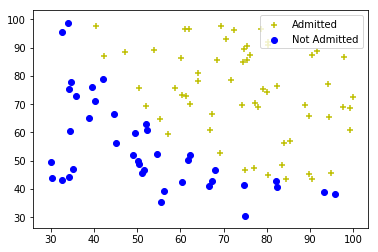

In [3]:
def plotData(positive, negetive):
    plt.scatter(x=positive['Exam1'], y=positive['Exam2'], c='y', marker='+',label='Admitted')
    plt.scatter(x=negetive['Exam1'], y=negetive['Exam2'], c='b', label='Not Admitted')
    plt.legend(loc=1)
plotData(positive, negetive)

In [4]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))
def cost_function(theta, X, y):
    return -np.mean((y * np.log(sigmoid_function(X @ theta))) + ((1 - y) * np.log(1 - sigmoid_function(X @ theta))))

In [5]:
data.insert(0, 'Ones', 1)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
theta = np.zeros(X.shape[1])
print(X.shape)
print(y.shape)
print(theta.shape)

(100, 3)
(100,)
(3,)


In [6]:
cost_function(theta, X, y)

0.6931471805599453

In [7]:
def gradient(theta, X, y):
    return ((sigmoid_function(X @ theta) - y) @ X) / len(X)
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [14]:
theta = gradient(theta, X, y)
print(theta)
cost_function(theta, X, y)

[ -0.6        -44.83135362 -44.37384125]


/home/lvconl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/lvconl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


nan

In [9]:
def prediction(theta, X):
    probability = sigmoid_function(X @ theta)
    return probability

In [10]:
predictions = prediction(theta, X)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

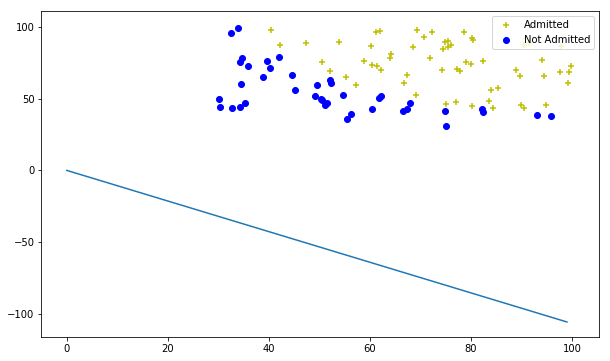

In [12]:
x1 = np.arange(100, step=1)
x2 = -(theta[0] + x1*theta[1]) / theta[2]
plt.figure(figsize=(10, 6))
plt.plot(x1, x2)
plt.scatter(x=positive['Exam1'], y=positive['Exam2'], c='y', marker='+',label='Admitted')
plt.scatter(x=negetive['Exam1'], y=negetive['Exam2'], c='b', label='Not Admitted')
plt.legend(loc=1)

In [13]:
cost_function(theta, X, y)

/home/lvconl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/lvconl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


nan